In [75]:
import pandas as pd

In [76]:
import numpy as np

In [77]:
import matplotlib.pyplot as plt
import spectrum_utils.spectrum as sus
import spectrum_utils.plot as sup

In [78]:
cfmid_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/resources/starting_files/nist/cfmid_output_csv_nist20_only_adduct_[M+H]+_msrb_relaced.csv'
nist_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/resources/starting_files/nist/nist20_hr_csv.txt'

In [79]:

# for each of those, one similarity >900 one similarity <100
# 519     Organoheterocyclic compounds    MTHORRSSURHQPZ-UHFFFAOYSA-N     0.091020        0.0
# 52      Organoheterocyclic compounds    WFXUUYPOUZBRTH-UHFFFAOYSA-N     0.976948        0.0
# 95      Benzenoids      IFPPTFSQAJZOCG-UHFFFAOYSA-N     0.077380        1.0
# 27      Benzenoids      UFPWOSSFAUAVAQ-UHFFFAOYSA-N     0.964589        1.0
# so these are our "40 eV" spectra
inchikey_list=[
    'MTHORRSSURHQPZ-UHFFFAOYSA-N',
    'WFXUUYPOUZBRTH-UHFFFAOYSA-N',
    'IFPPTFSQAJZOCG-UHFFFAOYSA-N',
    'UFPWOSSFAUAVAQ-UHFFFAOYSA-N'
]

In [93]:
def extract_spectra_from_inchikey(temp_file_address,temp_inchikey_list,file_type):
    if file_type=='cfmid':
        file_iterator=pd.read_csv(temp_file_address,sep='¬',chunksize=5000)
    elif file_type=='nist':
        file_iterator=pd.read_csv(temp_file_address,sep='@@@',chunksize=5000)
                                  
    total_extract_list=list()
    
    for i,chunk in enumerate(file_iterator):
        #print(chunk.loc[chunk.InChIKey==temp_inchikey,:])
        
        total_extract_list.append(chunk.loc[chunk.InChIKey.isin(temp_inchikey_list),:])
        #rint(chunk)
    total_extract_panda=pd.concat(total_extract_list,axis='index')
    return total_extract_panda

In [87]:
result_panda_cfmid=extract_spectra_from_inchikey(cfmid_address,inchikey_list,'cfmid')

<ipython-input-86-bae3e49a53cb>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  file_iterator=pd.read_csv(temp_file_address,sep='¬',chunksize=5000)


In [97]:
result_panda_cfmid=result_panda_cfmid.loc[result_panda_cfmid['energy#']=='energy2',:]

In [98]:
result_panda_cfmid

,InChIKey,energy#,mperz0,intensity0,mperz1,intensity1,mperz2,intensity2,mperz3,intensity3,...,intensity1036,mperz1037,intensity1037,mperz1038,intensity1038,mperz1039,intensity1039,mperz1040,intensity1040,Unnamed: 2084
371,WFXUUYPOUZBRTH-UHFFFAOYSA-N,energy2,39.022927,9.324147,41.038577,100.000000,43.017841,29.695591,57.033491,35.300475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8897,IFPPTFSQAJZOCG-UHFFFAOYSA-N,energy2,56.049476,5.689819,79.054227,5.168603,91.054227,15.237317,98.999604,14.101797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15512,MTHORRSSURHQPZ-UHFFFAOYSA-N,energy2,41.038577,11.935701,65.038577,11.497127,77.038577,3.983307,79.054227,5.239618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36206,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,energy2,41.038577,43.414084,44.013090,41.033108,57.033491,56.807876,59.049141,55.958501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
result_panda_nist=extract_spectra_from_inchikey(nist_address,inchikey_list,'nist')

<ipython-input-93-3bb9a610e625>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file_iterator=pd.read_csv(temp_file_address,sep='@@@',chunksize=5000)


In [100]:
result_panda_nist.iloc[0,0:26]

CASNO                                                          5658708
Collision_energy                                            NCE=2% 1eV
Collision_gas                                                       N2
Comment                             NIST Mass Spectrometry Data Center
ExactMass                                                    257.00514
Formula                                                    C10H12BrNO2
ID                                                              479310
In-source_voltage                                                  NaN
InChIKey                                   UFPWOSSFAUAVAQ-UHFFFAOYSA-N
Instrument                              Thermo Finnigan Elite Orbitrap
Instrument_type                                                    HCD
Ion_mode                                                             P
Ionization                                                         ESI
Link                                                               NaN
MW    

In [105]:
result_panda_nist_2=result_panda_nist.loc[
    (result_panda_nist.Instrument_type=='HCD') &
    (result_panda_nist.Precursor_type=='[M+H]+')
]

In [106]:
result_panda_nist_2

,CASNO,Collision_energy,Collision_gas,Comment,ExactMass,Formula,ID,In-source_voltage,InChIKey,Instrument,...,intensity1036,mperz1037,intensity1037,mperz1038,intensity1038,mperz1039,intensity1039,mperz1040,intensity1040,Unnamed: 2108
479302,5658708,NCE=2% 1eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479310,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479303,5658708,NCE=5% 2eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479311,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479304,5658708,NCE=10% 4eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479312,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479305,5658708,NCE=10% 5eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479313,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479306,5658708,NCE=10% 6eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479314,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786116,130641382,NCE=75% 48eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786128,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786117,130641382,NCE=90% 58eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786129,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786118,130641382,NCE=110% 71eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786130,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786119,130641382,NCE=130% 84eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786131,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
result_panda_nist_2=result_panda_nist_2.loc[result_panda_nist_2['Collision_energy'].str.contains('eV'),result_panda_nist_2.columns]        
result_panda_nist_2['experimental_collision_parsed']=result_panda_nist_2['Collision_energy'].str.findall(r'[0-9]+').str[1].astype(float)

In [109]:
result_panda_nist_2

,CASNO,Collision_energy,Collision_gas,Comment,ExactMass,Formula,ID,In-source_voltage,InChIKey,Instrument,...,mperz1037,intensity1037,mperz1038,intensity1038,mperz1039,intensity1039,mperz1040,intensity1040,Unnamed: 2108,experimental_collision_parsed
479302,5658708,NCE=2% 1eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479310,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
479303,5658708,NCE=5% 2eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479311,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
479304,5658708,NCE=10% 4eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479312,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
479305,5658708,NCE=10% 5eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479313,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
479306,5658708,NCE=10% 6eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479314,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786116,130641382,NCE=75% 48eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786128,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0
786117,130641382,NCE=90% 58eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786129,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0
786118,130641382,NCE=110% 71eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786130,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0
786119,130641382,NCE=130% 84eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786131,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0


In [112]:
inchikeys=result_panda_nist_2.loc[
    (result_panda_nist_2.experimental_collision_parsed>35) & 
    (result_panda_nist_2.experimental_collision_parsed<45)
].InChIKey.unique()

In [114]:
#go through all inchikeys
#for each inchikey, select the zone with ev between 35 and 45 (so we dont get anything too far off "optimal")
#select the row with the minimum ev of all of those between 35 and 45
#could maybe select the one closest to 40, but it doesnt make that much of a difference and is a lot of headache
#put the results into a dictionary
index_list=list()
for i,temp_inchikey in enumerate(inchikeys):
    if i%500==0:
        print(i)
    temp_min_energy=result_panda_nist_2.loc[
            (result_panda_nist_2['InChIKey']==temp_inchikey) & 
            (result_panda_nist_2.experimental_collision_parsed>35) & 
            (result_panda_nist_2.experimental_collision_parsed<45)
        ].experimental_collision_parsed.min()
    #print(temp_min_energy)
    temp_index=result_panda_nist_2.loc[
            (result_panda_nist_2['InChIKey']==temp_inchikey) & 
            (result_panda_nist_2.experimental_collision_parsed==temp_min_energy)
        ].index[0]
    index_list.append(temp_index)

0


In [115]:
result_panda_nist_2=result_panda_nist_2.loc[
    index_list,:
]

In [116]:
result_panda_nist_2

,CASNO,Collision_energy,Collision_gas,Comment,ExactMass,Formula,ID,In-source_voltage,InChIKey,Instrument,...,mperz1037,intensity1037,mperz1038,intensity1038,mperz1039,intensity1039,mperz1040,intensity1040,Unnamed: 2108,experimental_collision_parsed
479322,5658708,NCE=75% 38eV,N2,NIST Mass Spectrometry Data Center,257.005140,C10H12BrNO2,479330,NaN,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
524818,64834599,NCE=95% 36eV,N2,NIST Mass Spectrometry Data Center,185.060741,C9H12ClNO,524827,NaN,IFPPTFSQAJZOCG-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
525836,924832939,NCE=75% 36eV,N2,NIST Mass Spectrometry Data Center,240.018936,C11H9ClO4,525845,NaN,WFXUUYPOUZBRTH-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
786115,130641382,NCE=60% 39eV,N2,NIST Mass Spectrometry Data Center,324.147392,C19H20N2O3,786127,NaN,MTHORRSSURHQPZ-UHFFFAOYSA-N,Thermo Finnigan Elite Orbitrap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0


In [128]:
result_panda_nist_2.drop('experimental_collision_parsed',axis='columns',inplace=True)

In [118]:
result_panda_cfmid

,InChIKey,energy#,mperz0,intensity0,mperz1,intensity1,mperz2,intensity2,mperz3,intensity3,...,intensity1036,mperz1037,intensity1037,mperz1038,intensity1038,mperz1039,intensity1039,mperz1040,intensity1040,Unnamed: 2084
371,WFXUUYPOUZBRTH-UHFFFAOYSA-N,energy2,39.022927,9.324147,41.038577,100.000000,43.017841,29.695591,57.033491,35.300475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8897,IFPPTFSQAJZOCG-UHFFFAOYSA-N,energy2,56.049476,5.689819,79.054227,5.168603,91.054227,15.237317,98.999604,14.101797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15512,MTHORRSSURHQPZ-UHFFFAOYSA-N,energy2,41.038577,11.935701,65.038577,11.497127,77.038577,3.983307,79.054227,5.239618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36206,UFPWOSSFAUAVAQ-UHFFFAOYSA-N,energy2,41.038577,43.414084,44.013090,41.033108,57.033491,56.807876,59.049141,55.958501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
def prepare_row_for_daphnis(received_spectrum):
    is_nan=~np.isnan(received_spectrum)
    received_spectrum_no_nan=received_spectrum[is_nan]
    received_spectrum_pair_list=list()
    for i in range(0,len(received_spectrum_no_nan),2):
        received_spectrum_pair_list.append([received_spectrum_no_nan[i],received_spectrum_no_nan[i+1]])
    received_spectrum_pair_array=np.array(received_spectrum_pair_list)
    return received_spectrum_pair_array

In [130]:
def normalize_daphnis_spectrum(raw_spectrum):
    normalization_constant=max(raw_spectrum[:,1])
    #print(normalization_constant)
    #hold=input('hold')
    for mass_intensity_pair in raw_spectrum:
        mass_intensity_pair[1]=100*(mass_intensity_pair[1])/normalization_constant
    
    return raw_spectrum

In [133]:
def prepare_spectrum(series,number_of_metadata_columns):
    spectrum_array=np.array(series.iloc[number_of_metadata_columns:],dtype=float)
    #print(spectrum_array)
    spectrum_array=prepare_row_for_daphnis(spectrum_array)
    #print(spectrum_array)
    spectrum_array=normalize_daphnis_spectrum(spectrum_array)
    #print(spectrum_array)
    return spectrum_array

In [135]:
inchikey_list

['MTHORRSSURHQPZ-UHFFFAOYSA-N',
 'WFXUUYPOUZBRTH-UHFFFAOYSA-N',
 'IFPPTFSQAJZOCG-UHFFFAOYSA-N',
 'UFPWOSSFAUAVAQ-UHFFFAOYSA-N']

In [164]:
spectrum_dict_list=[
    [
        #'MTHORRSSURHQPZ-UHFFFAOYSA-N':
        {
            'cfmid':None,
            'nist':None
        },
        #'WFXUUYPOUZBRTH-UHFFFAOYSA-N':
        {
            'cfmid':None,
            'nist':None
        }
    ],
    [
        #'IFPPTFSQAJZOCG-UHFFFAOYSA-N':
        {
            'cfmid':None,
            'nist':None
        },
        #'UFPWOSSFAUAVAQ-UHFFFAOYSA-N':
        {
            'cfmid':None,
            'nist':None
        }
    ]
]

In [165]:
spectrum_dict_list

[[{'cfmid': None, 'nist': None}, {'cfmid': None, 'nist': None}],
 [{'cfmid': None, 'nist': None}, {'cfmid': None, 'nist': None}]]

MTHORRSSURHQPZ-UHFFFAOYSA-N
[[ 41.03857658  11.93570092]
 [ 65.03857658  11.49712714]
 [ 77.03857658   3.9833065 ]
 [ 79.05422664   5.23961821]
 [ 91.05422664 100.        ]
 [ 93.06987671  42.17521625]
 [182.0964258    4.77318   ]]
WFXUUYPOUZBRTH-UHFFFAOYSA-N
[[ 39.02292652   9.32414749]
 [ 41.03857658 100.        ]
 [ 43.01784114  29.69559071]
 [ 57.0334912   35.30047502]
 [ 59.04914126  18.00260166]
 [ 72.98395416  20.70723988]
 [ 98.99960423  10.70479937]
 [110.9996042   24.6944045 ]
 [117.0334912   17.55473547]
 [125.0152543   69.53045586]
 [150.9945188   48.79646619]
 [151.0309044   10.28805902]
 [153.0101689   48.13949945]
 [169.0050835   11.46948314]
 [181.0050835   10.38987947]
 [239.0105628    8.86223027]]
WFXUUYPOUZBRTH-UHFFFAOYSA-N
[[ 39.02292652   9.32414749]
 [ 41.03857658 100.        ]
 [ 43.01784114  29.69559071]
 [ 57.0334912   35.30047502]
 [ 59.04914126  18.00260166]
 [ 72.98395416  20.70723988]
 [ 98.99960423  10.70479937]
 [110.9996042   24.6944045 ]
 [117.0334912  

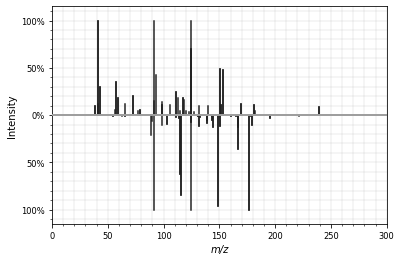

In [168]:
x_num=2
y_num=2
for i in range(x_num):
    for j in range(y_num):
        
        temp_inchikey=inchikey_list[i+j]
        print(temp_inchikey)
        temp_cfmid_spectrum=prepare_spectrum(
            result_panda_cfmid.loc[
                result_panda_cfmid.InChIKey==temp_inchikey
            ].squeeze(),
            2
        )
        temp_nist_spectrum=prepare_spectrum(
            result_panda_nist_2.loc[
                result_panda_nist_2.InChIKey==temp_inchikey
            ].squeeze(),
            26
        )
        print(temp_cfmid_spectrum)
        spectrum_cfmid=sus.MsmsSpectrum(
                 0, 0, 0,
                 temp_cfmid_spectrum[:,0],temp_cfmid_spectrum[:,1]
        )
        spectrum_nist=sus.MsmsSpectrum(
                 0, 0, 0,
                 temp_nist_spectrum[:,0],temp_nist_spectrum[:,1]
        )
        print(spectrum_cfmid)
        spectrum_dict_list[i][j]['cfmid']=spectrum_cfmid
        spectrum_dict_list[i][j]['nist']=spectrum_nist
        sup.mirror(
            spectrum_cfmid,
            spectrum_nist
        )

In [167]:
spectrum_dict_list

[[{'cfmid': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc884d92fd0>,
   'nist': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc884d92c40>},
  {'cfmid': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc884d92ee0>,
   'nist': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc884d92e80>}],
 [{'cfmid': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc884bb3940>,
   'nist': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc882db6520>},
  {'cfmid': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc884ba5c70>,
   'nist': <spectrum_utils.spectrum.MsmsSpectrum at 0x7fc884ba5b50>}]]

AttributeError: 'NoneType' object has no attribute 'mz'

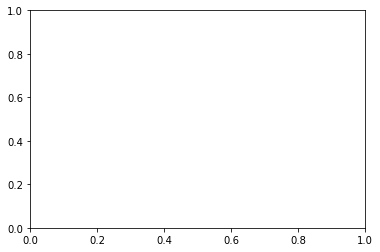

In [163]:
sup.mirror(
    spectrum_dict_list[0][0]['cfmid'],
    spectrum_dict_list[0][0]['cfmid']
)

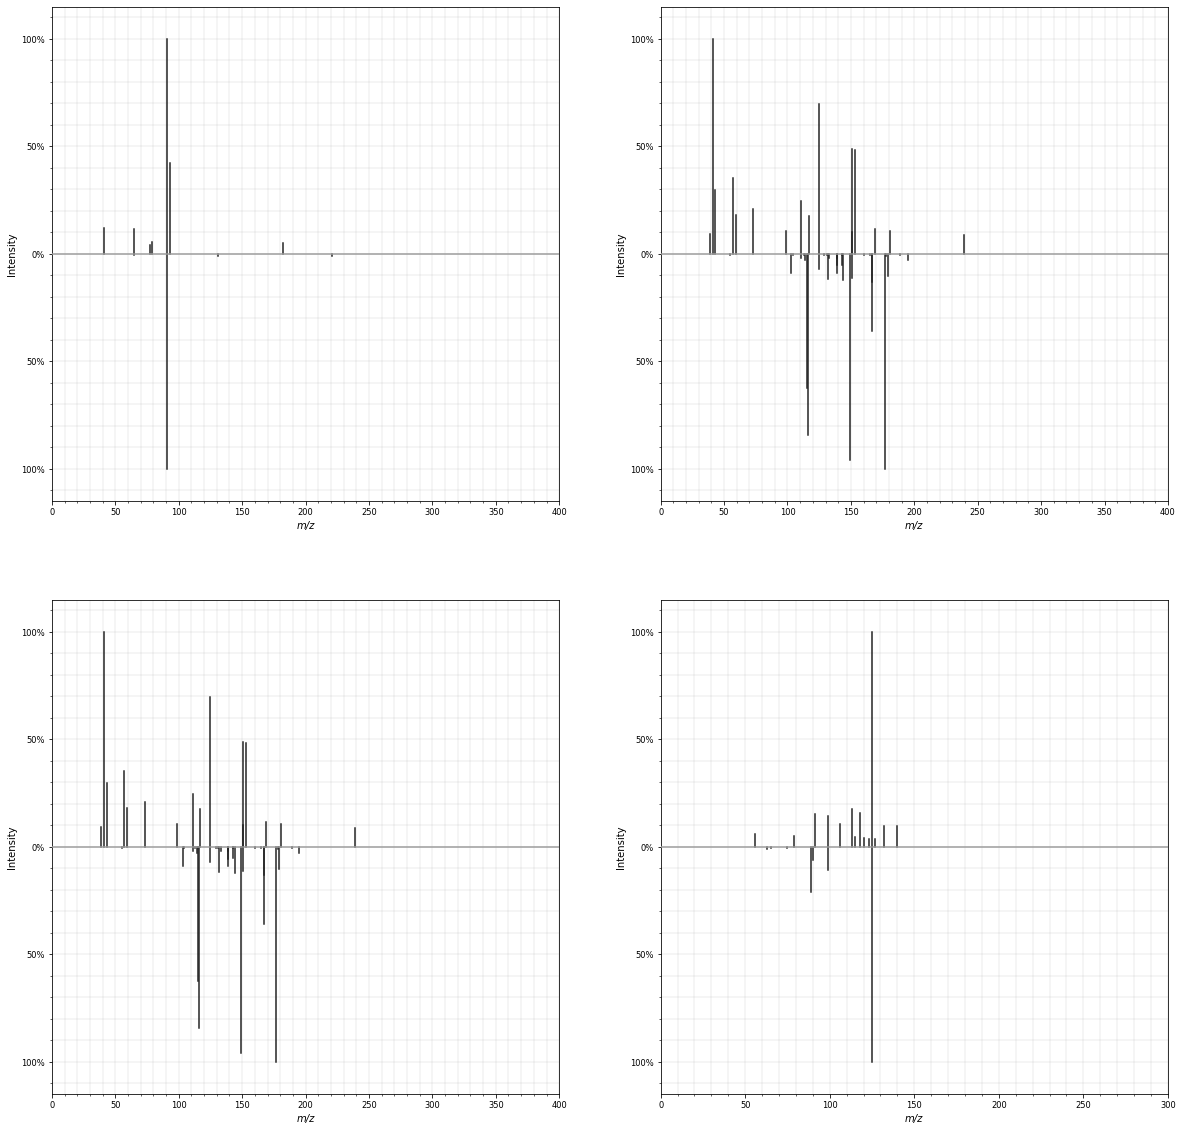

In [171]:

fig,axs=plt.subplots(2,2,figsize=(20,20),facecolor='w')
for i in range(x_num):
    for j in range(y_num):
        
        sup.mirror(
            spectrum_dict_list[i][j]['cfmid'],
            spectrum_dict_list[i][j]['nist'],
            ax=axs[i,j]
        )

In [ ]:

#https://github.com/bittremieux/spectrum_utils

<AxesSubplot:xlabel='m/z', ylabel='Intensity'>

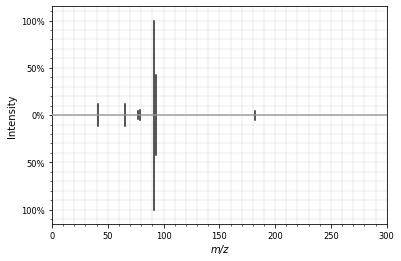

In [141]:
sup.mirror(
    spectrum_dict['MTHORRSSURHQPZ-UHFFFAOYSA-N']['cfmid'],
    spectrum_dict['MTHORRSSURHQPZ-UHFFFAOYSA-N']['cfmid'],
)

In [ ]:
# spectrum = sus.MsmsSpectrum(
#     0, 0, 0,
#     result_spectrum[:,0],result_spectrum[:,1])

# sup.mirror(
#     spectrum,
#     spectrum
# )